In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [32]:
# Load and prepare data
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:n] / 255.0  # Normalize to [0, 1]

data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n] / 255.0  # Normalize to [0, 1]

In [33]:
# Initialize parameters with better architecture
def init_params():
    # Increased hidden layer size from 10 to 128
    w1 = np.random.randn(128, 784) * np.sqrt(2. / 784)
    b1 = np.zeros((128, 1))
    w2 = np.random.randn(10, 128) * np.sqrt(2. / 128)
    b2 = np.zeros((10, 1))
    return w1, b1, w2, b2

def ReLU(z):
    return np.maximum(0, z)

def deriv_ReLU(z):
    return z > 0

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)
    
def forward_prop(w1, b1, w2, b2, x):
    z1 = w1.dot(x) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    return one_hot_y.T

def back_prop(z1, a1, z2, a2, w1, w2, x, y):
    m = y.size
    one_hot_y = one_hot(y)
    
    dz2 = a2 - one_hot_y
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2, axis=1, keepdims=True)
    
    dz1 = w2.T.dot(dz2) * deriv_ReLU(z1)
    dw1 = 1 / m * dz1.dot(x.T)
    db1 = 1 / m * np.sum(dz1, axis=1, keepdims=True)
    
    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1, b1, w2, b2

def get_prediction(a2):
    return np.argmax(a2, 0)

def get_accuracy(predictions, y):
    return np.sum(predictions == y) / y.size

def gradient_descent(x, y, x_dev, y_dev, iterations, alpha):
    w1, b1, w2, b2 = init_params()
    for i in range(iterations):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = back_prop(z1, a1, z2, a2, w1, w2, x, y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        
        if (i % 50 == 0):
            train_predictions = get_prediction(a2)
            train_acc = get_accuracy(train_predictions, y)
            
            # Check dev set accuracy
            _, _, _, a2_dev = forward_prop(w1, b1, w2, b2, x_dev)
            dev_predictions = get_prediction(a2_dev)
            dev_acc = get_accuracy(dev_predictions, y_dev)
            
            print(f"Iteration: {i} | Train Acc: {train_acc:.4f} | Dev Acc: {dev_acc:.4f}")
            
    return w1, b1, w2, b2


In [34]:
# Train with lower learning rate
w1, b1, w2, b2 = gradient_descent(x_train, y_train, x_dev, y_dev, 500, 0.5)


Iteration: 0 | Train Acc: 0.1103 | Dev Acc: 0.4220
Iteration: 50 | Train Acc: 0.8921 | Dev Acc: 0.8990
Iteration: 100 | Train Acc: 0.9263 | Dev Acc: 0.9220
Iteration: 150 | Train Acc: 0.9373 | Dev Acc: 0.9280
Iteration: 200 | Train Acc: 0.9441 | Dev Acc: 0.9370
Iteration: 250 | Train Acc: 0.9505 | Dev Acc: 0.9400
Iteration: 300 | Train Acc: 0.9556 | Dev Acc: 0.9450
Iteration: 350 | Train Acc: 0.9599 | Dev Acc: 0.9470
Iteration: 400 | Train Acc: 0.9632 | Dev Acc: 0.9520
Iteration: 450 | Train Acc: 0.9661 | Dev Acc: 0.9520


In [36]:
# Test on dev set
def make_predictions(x, w1, b1, w2, b2):
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, x)
    predictions = get_prediction(a2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = x_dev[:, index, None]
    prediction = make_predictions(current_image, w1, b1, w2, b2)
    label = y_dev[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Testing predictions:
Prediction:  [5]
Label:  5


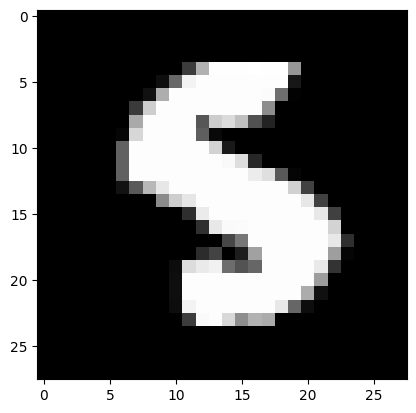

Prediction:  [3]
Label:  3


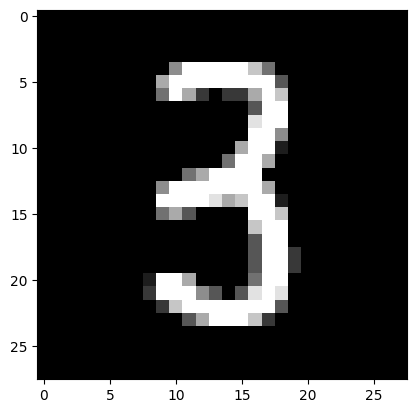

Prediction:  [2]
Label:  2


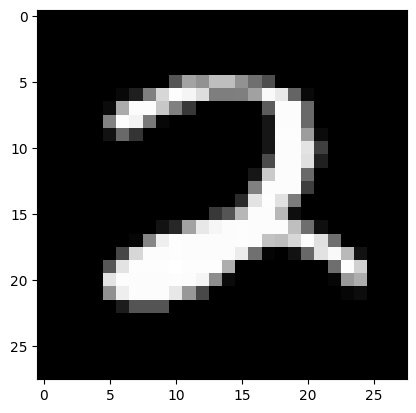

Prediction:  [8]
Label:  8


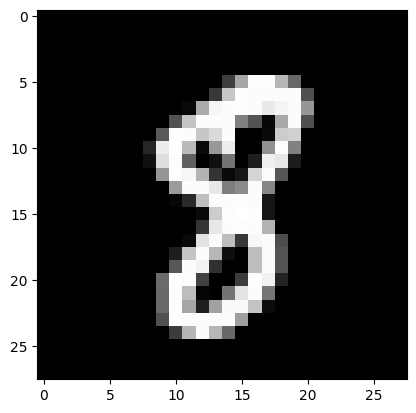

Prediction:  [4]
Label:  4


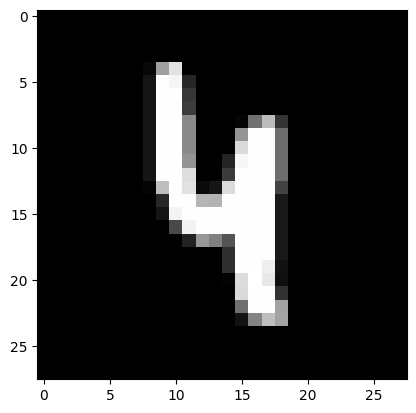

In [39]:
# Test a few predictions
print("\nTesting predictions:")
for i in range(5):
    test_prediction(i, w1, b1, w2, b2)